# jm_pandas test

In [1]:
## Standard Libs
from typing import Union, Optional, Tuple, Dict, Any
import warnings
import random

# Third-Party Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rich.console import Console
from rich.text import Text
from rich.panel import Panel

# Local Libs
from jm_datascience import jm_pandas as jm_pd
from jm_datascience import jm_pdaccessor

## Some Series and DFs

In [2]:
df_work = pd.DataFrame({
    'nombre': ['Ana', 'Bob', '', 'Carlos', ' ', 'Diana'],
    'apellido': ['A_Ana', 'B_Bob', None, 'C_Carlos', None, 'D_Diana'],
    'edad': [25, -1, 30, 999, 28, 22],
    'ciudad': ['Madrid', 'N/A', 'Barcelona', 'Valencia', 'unknown', 'Sevilla'],
    'salario': [50000, 0, 60000, -999, 55000, 48000]
})

## Read spreedsheet for tests
try:
    spreedsheet = r"C:\Users\jm\Documents\__Dev\PortableGit\__localrepos\365DS_jm\3_statistics\2_13_Practical_Ex_Descriptive_Stats.xlsx"    # Casa
    with open(spreedsheet) as f:
        pass
except FileNotFoundError:
    spreedsheet = r"D:\git\PortableGit\__localrepos\365DS_jm\3_statistics\2_13_Practical_Ex_Descriptive_Stats.xlsx"                         # Office

df_xls = pd.read_excel(spreedsheet, skiprows=4, usecols='B:J,L:AA', index_col='ID')
df = df_xls.copy()

lst_str = random.choices([chr(i) for i in range(65, 72)], k=99)
sr_str = jm_pd.to_serie_with_count(lst_str)                         # <- jm_pd.to_serie_with_count()


## jm_pd.to_serie_with_count()

In [3]:
sr_counted = jm_pd.to_serie_with_count(lst_str, count=True)
sr_counted

B    24
E    16
C    15
F    13
G    11
D    11
A     9
Name: count, dtype: int64

## infos()

In [4]:
## series info
sr_counted.info(memory_usage='deep')
print()
sr_counted.jm.infoplus()

<class 'pandas.core.series.Series'>
Index: 7 entries, B to A
Series name: count
Non-Null Count  Dtype
--------------  -----
7 non-null      int64
dtypes: int64(1)
memory usage: 706.0 bytes

<class 'pandas.core.series.Series'> | Index(['B', 'E', 'C', 'F', 'G', 'D', 'A'], dtype='object')
    Name  Dtype  N-Nulls  N-Non-Nulls  N-Uniques  Has-Duplicates
0  count  int64        0            7          6            True
memory usage: 706 bytes


In [5]:
df_work.index
df_work.info(memory_usage='deep')
# df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   nombre    6 non-null      object
 1   apellido  4 non-null      object
 2   edad      6 non-null      int64 
 3   ciudad    6 non-null      object
 4   salario   6 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 1.1 KB


In [6]:
# df_xls.info(memory_usage='deep')
df_work.jm.infoplus()

<class 'pandas.core.frame.DataFrame'> | RangeIndex(start=0, stop=6, step=1)
Data columns (total 5 columns):
--------------------------------
     Column   Dtype  N-Nulls  N-Non-Nulls  N-Uniques  Has-Duplicates
0    nombre  object        0            6          6           False
1  apellido  object        2            4          4            True
2      edad   int64        0            6          6           False
3    ciudad  object        0            6          6           False
4   salario   int64        0            6          6           False
memory usage: 1.1 KB


In [34]:
df_work.jm.infomax()
df.jm.infomax()
sr_str.jm.infoplus()
sr_str.jm.infomax()

<class 'pandas.core.series.Series'> | RangeIndex(start=0, stop=99, step=1)
     Name   Dtype  N-Nulls  N-Non-Nulls  N-Uniques  Has-Duplicates
0  Series  object        0           99          7            True
memory usage: 5.0 KB


{'name': None,
 'dtype': 'object',
 'shape': (99,),
 'size': 99,
 'n_total': 99,
 'n_nulls': np.int64(0),
 'n_non_nulls': np.int64(99),
 'pct_nulls': np.float64(0.0),
 'memory_usage': 5082.0,
 'memory_unit': 'bytes',
 'n_uniques': 7,
 'n_duplicates': np.int64(92),
 'has_duplicates': np.True_,
 'uniqueness_ratio': 0.071,
 'min_value': None,
 'max_value': None,
 'avg_length': np.float64(1.0),
 'min_length': np.int64(1),
 'max_length': np.int64(1),
 'empty_strings': np.int64(0),
 'whitespace_only': np.int64(0),
 'most_frequent_value': 'B',
 'most_frequent_count': np.int64(24),
 'most_frequent_pct': np.float64(24.24),
 'sample_values': ['F', 'E', 'B', 'G', 'D', 'A', 'C'],
 'top_values_distribution': {'B': {'count': 24, 'percentage': 24.24},
  'E': {'count': 16, 'percentage': 16.16},
  'C': {'count': 15, 'percentage': 15.15},
  'F': {'count': 13, 'percentage': 13.13},
  'G': {'count': 11, 'percentage': 11.11}}}

In [7]:
df.jm.info_cmp(df_xls)
# df.jm._df_infobase()

,Column,Dtype_df1,Dtype_df2,N-Nulls_df1,N-Nulls_df2,N-Uniques_df1,N-Uniques_df2,Has-Duplicates_df1,Has-Duplicates_df2
0,Age at time of purchase,object,object,88,88,47,47,True,True
1,Area (ft.),float64,float64,0,0,97,97,True,True
2,Building,int64,int64,0,0,5,5,True,True
3,Country,object,object,72,72,9,9,True,True
4,Customer ID,object,object,72,72,162,162,True,True
5,D,float64,float64,89,89,35,35,True,True
6,Deal satisfaction,float64,float64,72,72,5,5,True,True
7,Entity,object,object,72,72,2,2,True,True
8,Gender,object,object,89,89,2,2,True,True
9,Interval,object,object,89,89,6,6,True,True


In [8]:
sr_counted.info()
print()
sr_counted.jm.infoplus()

<class 'pandas.core.series.Series'>
Index: 7 entries, B to A
Series name: count
Non-Null Count  Dtype
--------------  -----
7 non-null      int64
dtypes: int64(1)
memory usage: 412.0+ bytes

<class 'pandas.core.series.Series'> | Index(['B', 'E', 'C', 'F', 'G', 'D', 'A'], dtype='object')
    Name  Dtype  N-Nulls  N-Non-Nulls  N-Uniques  Has-Duplicates
0  count  int64        0            7          6            True
memory usage: 706 bytes


In [9]:
def to_bytes_mult(value, decimals=1):

    if value < 0:
        return '0 bytes'

    units = ['bytes', 'KB', 'GB', 'TB', 'PB']
    unit_ix = 0

    while value >= 1024 and unit_ix < len(units) - 1:
        value /= 1024
        unit_ix += 1

    if unit_ix == 0:
        decimals = 0
    
    return f"{value:.{decimals}f} {units[unit_ix]}"


In [10]:
mem_bytes = (df_work.memory_usage(deep=True).sum())
# mem_bytes = (df_work.memory_usage().sum())
print(mem_bytes)
print(to_bytes_mult(mem_bytes))
print(to_bytes_mult(325.77))

1143
1.1 KB
326 bytes


In [11]:
df_work.jm.infoplus()

<class 'pandas.core.frame.DataFrame'> | RangeIndex(start=0, stop=6, step=1)
Data columns (total 5 columns):
--------------------------------
     Column   Dtype  N-Nulls  N-Non-Nulls  N-Uniques  Has-Duplicates
0    nombre  object        0            6          6           False
1  apellido  object        2            4          4            True
2      edad   int64        0            6          6           False
3    ciudad  object        0            6          6           False
4   salario   int64        0            6          6           False
memory usage: 1.1 KB


## Diversos convert_dtypes()

In [12]:
display(df_xls['Month of sale'].dtype)
display(df_xls['Month of sale'].convert_dtypes().dtype)
display(df_xls['Month of sale'].jm.convert_dtypesplus().dtype)
display(df_xls['Month of sale'].jm.convert_dtypesmax().dtype)

dtype('float64')

Int64Dtype()

Int64Dtype()

Int64Dtype()

In [13]:
display(df_xls['Age at time of purchase'].dtype)
display(df_xls['Age at time of purchase'].convert_dtypes().dtype)
display(df_xls['Age at time of purchase'].jm.convert_dtypesplus().dtype)
display(df_xls['Age at time of purchase'].jm.convert_dtypesmax().dtype)

dtype('O')

dtype('O')

Int64Dtype()

Int64Dtype()

In [14]:
display(df_xls['M'].dtype)
display(df_xls['M'].convert_dtypes().dtype)
display(df_xls['M'].jm.convert_dtypesplus().dtype)
display(df_xls['M'].jm.convert_dtypesmax().dtype)

dtype('float64')

Float64Dtype()

Float64Dtype()

Int64Dtype()

In [15]:
# display(df_work.dtypes) #, type(df_work.dtypes))
# display(df_work.convert_dtypes().dtypes)
df_xls_mini = df_xls[['Month of sale', 'Price', 'Status', 'Age at time of purchase', 'Y', 'M', 'D', 'State']]
display(df_xls_mini.dtypes)
display(df_xls_mini.convert_dtypes().dtypes)
display(df_xls_mini.jm.convert_dtypesplus().dtypes)
display(df_xls_mini.jm.convert_dtypesmax().dtypes)


Month of sale              float64
Price                      float64
Status                      object
Age at time of purchase     object
Y                          float64
M                          float64
D                          float64
State                       object
dtype: object

Month of sale                       Int64
Price                             Float64
Status                     string[python]
Age at time of purchase            object
Y                                   Int64
M                                 Float64
D                                 Float64
State                      string[python]
dtype: object

Month of sale                       Int64
Price                             Float64
Status                     string[python]
Age at time of purchase             Int64
Y                                   Int64
M                                 Float64
D                                 Float64
State                      string[python]
dtype: object

Month of sale                       Int64
Price                             Float64
Status                     string[python]
Age at time of purchase             Int64
Y                                   Int64
M                                   Int64
D                                   Int64
State                      string[python]
dtype: object

In [16]:
### OJO para ver como se comporta en cols objects
result = df.select_dtypes(include='number').apply('mode')
result

,Building,Year of sale,Month of sale,Property #,Area (ft.),Price,Y,M,D,Deal satisfaction
0,3.0,2007.0,11.0,34.0,781.0684,460001.256,1959.0,6.0,5.0,5.0
1,NaN,NaN,NaN,NaN,794.5184,NaN,NaN,NaN,13.0,NaN
2,NaN,NaN,NaN,NaN,798.2844,NaN,NaN,NaN,NaN,NaN


In [ ]:
## veamos si apply es 'inplace' - NOO no es inplace.
df_xls_mini
def clean(col):
    if pd.api.types.is_numeric_dtype(col):
        return col.fillna(col.mean())
    elif pd.api.types.is_string_dtype(col):
        return col.fillna("SIN DATO")
    else:
        return col.fillna("OTRO")
    
def fpru(col):
    return col.convert_dtypes()

df_xls_mini.transform(fpru)
df_xls_mini.apply(fpru)
df_xls_mini
    

,Month of sale,Price,Status,Age at time of purchase,Y,M,D,State
ID,,,,,,,,
1030,11.0,246172.6760,Sold,19,1986.0,6.0,21.0,California
1029,10.0,246331.9040,Sold,22,1983.0,2.0,24.0,California
2002,7.0,209280.9104,Sold,22,1985.0,12.0,27.0,California
2031,12.0,452667.0064,Sold,22,1985.0,12.0,27.0,California
1049,11.0,467083.3132,Sold,25,1979.0,5.0,15.0,California
...,...,...,...,...,...,...,...,...
5044,NaN,322610.7392,NaN,NaN,NaN,NaN,NaN,NaN
5047,NaN,279191.2560,NaN,NaN,NaN,NaN,NaN,NaN
5048,NaN,287996.5296,NaN,NaN,NaN,NaN,NaN,NaN


## fmt_value_for_pd(value, width=8, decimals=2, miles=','):

In [18]:
display(df_work.map(lambda x: jm_pd.fmt_value_for_pd(x, decimals=0, miles='_')))

df_work_b = df_work.copy()

for col in df_work_b.columns:
    df_work_b[col] = df_work_b[col].map(lambda x: jm_pd.fmt_value_for_pd(x, decimals=0))

# df_work_b.isna()
df_work.isna().sum().sum()


,nombre,apellido,edad,ciudad,salario
0,Ana,A_Ana,25,Madrid,50_000
1,Bob,B_Bob,-1,N/A,0
2,,None,30,Barcelona,60_000
3,Carlos,C_Carlos,999,Valencia,-999
4,,None,28,unknown,55_000
5,Diana,D_Diana,22,Sevilla,48_000


np.int64(2)

## describeplus()

In [19]:
df_xls.describe(include='all')
df_xls['Num_Age...'] = pd.to_numeric(df_xls['Age at time of purchase'], errors='coerce')
df_xls[['Age at time of purchase', 'Num_Age...']].jm.infomax()

,Column,Dtype,N-Nulls,N-Total,N-Uniques,Pct-Nulls,Memory-Usage,Min-Value,Max-Value,Most-Frequent,Freq-Count,Has-Duplicates,Sample-Values
0,Age at time of purchase,object,88,179,47,33.0,11410,NaN,NaN,48.0,11,True,"[19, 22, 25, 26]"
1,Num_Age...,float64,89,178,46,33.3,4272,19.0,76.0,48.0,11,True,"[19.0, 22.0, 25.0, 26.0]"


In [20]:
jm_pd.describeplus(df_xls['Age at time of purchase'])

,Age at time of purchase
Non-null Count,179
Null Count,88
Total Count,267
Unique Count,47
Top (mode),48
Freq. mode,11


In [21]:
jm_pd.describeplus(df_xls['Num_Age...'])

,Num_Age...,formatted
Non-null Count,178,178
Null Count,89,89
Total Count,267,267
Unique Count,46,46
Mean,46.151685,46.15
Median (50%),45.0,45
Mode(s),48.0,48
Mode_freq,11,11
Skewness,0.238538,0.24
Variance,164.909065,164.91


## Pie - Donut chart

In [22]:
cat_1 = pd.Series([35, 25, 20, 12, 8], index=['Product A', 'Product B', 'Product C', 'Product D', 'Product E'])
cat_2 = pd.Series({'Region A': 45,'Region B': 30,'Region C': 25})

cat_3 = pd.DataFrame([25, 30, 20, 15, 10], index=['A', 'B', 'C', 'D', 'E'], columns=['values'])     
# cat_3 = pd.DataFrame([[25], [30], [20], [15], [10]], index=['A', 'B', 'C', 'D', 'E'], columns=['values'])     # [ERR] values are np.ndarrays, ex. [25] 1x1 array?
cat_4 = pd.Series({'Region A': 45,'Region B': 30,'Region C': 25, 'Region D': 17})
cat_5 = pd.Series([25, 30, 20, 15, 10], index=['A', 'B', 'C', 'D', 'E'], name='Frequency')
# cat_6 = pd.DataFrame(pd.Series)
# cat_7 = pd.Series.to_frame()

# cat_3.dtypes
# for i in range(len(cat_3)):
#     print(f"{cat_3['values'].iloc[i]} | {type(cat_3['values'].iloc[i]) = }")

# for value in cat_3.values:
#       print(f"{value = } | {type(value) = }")

# for value in cat_3['values'].values:
#      print(f"{value = } | {type(value) = }")

In [23]:
# data = cat_3
# if isinstance(data, pd.DataFrame):                      # Only one-column df
#     if data.shape[1] != 1:
#         raise ValueError(
#             f"DataFrame must have exactly one column. Got {data.shape[1]} columns."
#         )
#     else:                                               # One-clolumn df to Serie
#         data = data.iloc[:, 0]

# for value in data.values:
#     print(f"{value = } | {type(value) = }")
#     if not isinstance(value, (int, float, np.integer, np.floating)):
#         print(f"{value = } | {type(value) = }")

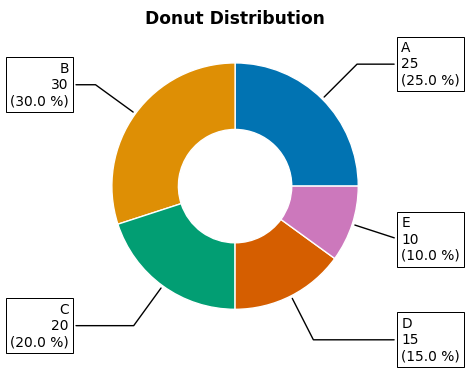

In [24]:
fig, ax = jm_pd.plt_pie(cat_3, kind='donut', title='Donut Distribution', startangle=0)

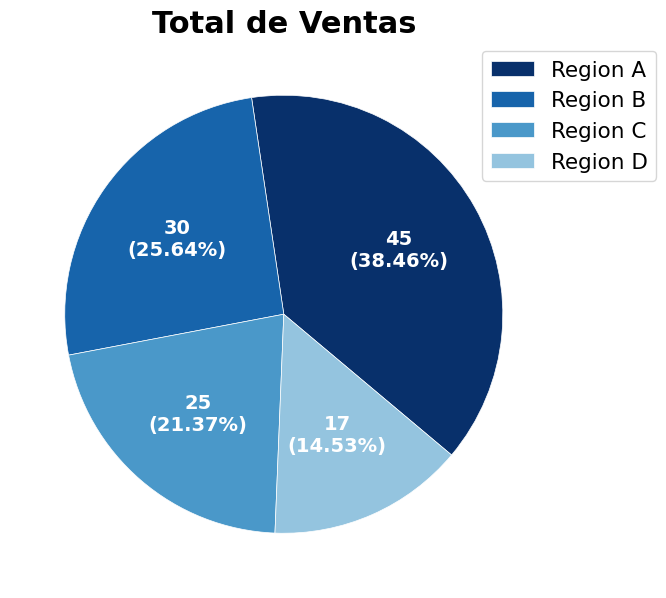

In [25]:
# # fig, ax = jm_pandas.plt_piechart(catdf_1, title='Total de Ventas', rotate=-40)
# # fig, ax = jm_pandas.plt_pie_2(catdf_1, title='Total de Ventas')
fig, ax = jm_pd.plt_pie(cat_4, title='Total de Ventas', kind='pie', label_place='int', scale=4, palette='Blues_r')

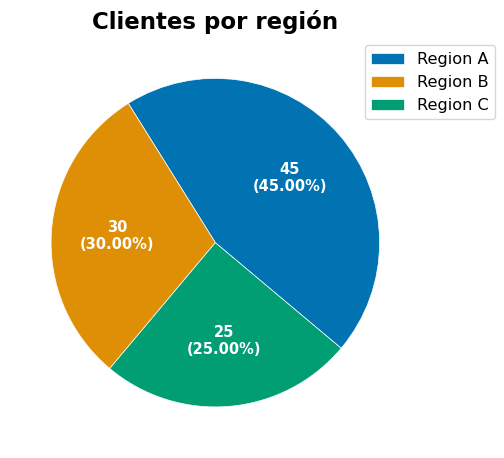

In [26]:
fig, ax = jm_pd.plt_pie(cat_2, title='Clientes por región', scale=3, label_place='int')
# fig, ax = jm_pandas.plt_pie_1(catdf_2, title='Clientes por región')
# fig, ax = jm_pandas.plt_piechart2(catdf_2, title='Clientes por región')

## pd_accessor para Series y para DFs

In [27]:
df.jm.generals()
df['Age at time of purchase'].jm.generals()

{'type': 'Series',
 'shape': (267,),
 'memory_usage': 11410,
 'memory_usage_mb': 0.010881423950195312,
 'null_count': np.int64(88),
 'dtype': 'object',
 'name': 'Age at time of purchase',
 'unique_values': 47,
 'value_counts': {48: 11, 41: 8, 60: 7, 40: 6, 33: 6}}

In [28]:
# print(df.columns)
# df.jm.infomax()
# df['Age at time of purchase'].jm.infomax()
df['State'].jm.profile()
# df.jm.profile()


,Metric,Value
0,Name,State
1,Dtype,object
2,N Total,267
3,N Nulls,86
4,N Non Nulls,181
5,Pct Nulls,32.21
6,Memory Usage,15349.0
7,N Uniques,9
8,Uniqueness Ratio,0.034
9,Min Value,None


## describeplus() -> method?

In [29]:
df.describe(include='all')
display(df.describe())
display(df['Age at time of purchase'].describe())

,Building,Year of sale,Month of sale,Property #,Area (ft.),Price,Y,M,D,Deal satisfaction
count,267.000000,195.000000,195.000000,267.000000,267.000000,267.000000,178.000000,178.000000,178.000000,195.000000
mean,2.947566,2006.333333,7.271795,27.580524,936.221113,281171.901501,1960.325843,6.752809,15.449438,3.605128
std,1.391794,1.072941,3.378674,15.361437,284.895016,89119.120849,12.835575,3.450312,8.457285,1.363355
min,1.000000,2004.000000,1.000000,1.000000,410.709200,117564.071600,1931.000000,1.000000,1.000000,1.000000
25%,2.000000,2006.000000,4.000000,14.500000,756.212800,217553.056400,1950.250000,4.000000,8.000000,3.000000
50%,3.000000,2007.000000,8.000000,28.000000,798.284400,249075.656800,1962.000000,6.000000,15.000000,4.000000
75%,4.000000,2007.000000,10.000000,40.000000,1121.945200,326964.852200,1969.750000,9.750000,23.750000,5.000000
max,5.000000,2010.000000,12.000000,59.000000,1942.502800,538271.735600,1986.000000,15.000000,31.000000,5.000000


count     179
unique     47
top        48
freq       11
Name: Age at time of purchase, dtype: int64

In [30]:
# describeplus() para Series y para DFs
display(df3.describe())
display(df3['Age at time of purchase'].describe())
df3.jm.infomax()
df3['Age at time of purchase'].describe()


NameError: name 'df3' is not defined

## Numeric Cols
- Basicamente todas las cols a las que les pueda calcular min() y max(), etc. Tambien porque son oject pero tiene números.

In [ ]:
## Read the data (a table) into a DF
# Useful data from row 5 to the end (row 272) -> skiprows=4 [avoid title rows, first four rows]
# Column k is empty, avoid k column -> usecols='B:J,L:AA'
# I Will take ID column as the DF index_col (because ID is unique for each operation)

spreedsheet = r"C:\Users\jm\Documents\__Dev\PortableGit\__localrepos\365DS_jm\3_statistics\2_13_Practical_Ex_Descriptive_Stats.xlsx"    # Casa
# spreedsheet = r"D:\git\PortableGit\__localrepos\365DS_jm\3_statistics\2_13_Practical_Ex_Descriptive_Stats.xlsx"                         # Office

df = pd.read_excel(spreedsheet, skiprows=4, usecols='B:J,L:AA', index_col='ID')

# df.info()
df1 = df.convert_dtypes()
df2 = df.jm.convert_dtypes_plus()
df3 = df.jm.convert_dtypes_max()
# df1.info()

In [ ]:
# df3.jm.infomax()

In [ ]:
## Distintos métodos de replace values - claude
# ----- 1. .replace() me da Warning !
# serie_str = df['Age at time of purchase'].replace(' ', np.nan)  # Warning 
# df['a1'] = df['Age at time of purchase'].replace(' ', np.nan)  # Warning 
# ----- 2. Condiciones Booleanas bajo la sintaxis df.loc[rows w/conditions, col] = value
display(df['Age at time of purchase'].isna().sum())
df_2 = df.copy()
df_2.loc[df_2['Age at time of purchase'] == ' ', 'Age at time of purchase'] = np.nan    # SII, .replace() con muchos warnings
df_2['Age at time of purchase'].isna().sum()
# ----- 2. Ventajas:    - Desventaja:

In [ ]:
# ----- 3. Usando .mask() que aplica en caso True (.where() aplica en caso Falso <- por eso solo probamos mask
display(df['Age at time of purchase'].isna().sum())
df_3 = df.copy()
df_3['Age at time of purchase'] = df_3['Age at time of purchase'].mask(df_3['Age at time of purchase'] == ' ', np.nan)
df_3['Age at time of purchase'].isna().sum()

In [ ]:
## Hay varios más. np.where() , apply -> es muy versatil ya que acepta funciones ad-hoc
# ----- 4. .apply() - puedo hacer la función tan compleja como yo quiera

def replace_spaces_by_nans(value):
    if isinstance(value, str) and value.isspace():
            return np.nan
    return value

display(df['Age at time of purchase'].isna().sum())
df_4 = df.copy()
df_4['Age at time of purchase'] = df_4['Age at time of purchase'].apply(replace_spaces_by_nans)
df_4['Age at time of purchase'].isna().sum()

In [ ]:
# ----- 5. apply() con lambda por ser my sencilla la func.
display(df['Age at time of purchase'].isna().sum())
df_5 = df.copy()
df_5['Age at time of purchase'] = df_5['Age at time of purchase'].apply(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)
df_5['Age at time of purchase'].isna().sum()
# np.where() dice Claude, que es más rápido para grandes DFs.

In [ ]:
## Ejemplos de reemplazo de valores con un df ad-hoc.
df = pd.DataFrame({
    'nombre': ['Ana', 'Bob', '', 'Carlos', ' ', 'Diana'],
    'edad': [25, -1, 30, 999, 28, 22],
    'ciudad': ['Madrid', 'N/A', 'Barcelona', 'Valencia', 'unknown', 'Sevilla'],
    'salario': [50000, 0, 60000, -999, 55000, 48000]
})

print("DataFrame original:")
print(df)
print()

# =============================================================================
# 1. MÉTODO .replace() - EL MÁS VERSÁTIL
# =============================================================================

print("1. MÉTODO .replace()")
print("-" * 40)

# Reemplazar un valor específico por otro
df_1 = df.copy()
df_1['nombre'] = df_1['nombre'].replace(['', ' '], np.nan)
print("Reemplazar string vacío por NaN:")
print(df_1['nombre'])
print()

In [ ]:
# df3.info()

In [ ]:
## Convierte a Int64 si todos los tiene su parte decimal menor a 0.0000001

# to_Int64_if_small_decimal(df['M'], 0.0000001)
# df1['Price'].apply(is_decimal_part_petty)

# df1['Price'].apply(lambda x: True if x % 1 < 0.0000001 else False)
# df1['m2'] = df1['M'].dropna()
# df1['m2']
# df1['M']
if df1['Price'].apply(lambda x: True if x % 1 < 0.0000001 or pd.isna(x) else False).all():
    print('SIIII')
else:
    print('NOOOooooo....')

# df1['M'][df1['M'] == True].all()

In [ ]:
# number of ceros in decimal part
num = df1['Price'].iloc[9]
decimal_part = num % 1
# print(f"{num = } | {decimals = }")
# s = f"{num:.16f}".rstrip('0').split('.')
# print(f"{s[0] = } | {s[1] = }")

In [ ]:
stop()

In [ ]:
## Descubrimos un ' ' en ix = 5052 de la columna 'Age at time...
display(df['Age at time of purchase'].isna().sum())
display(df['Age at time of purchase'].dtype)
# display(df['Age at time of purchase'].loc[5052])
# df.loc[5052, 'Age at time of purchase'] = np.nan
# display(df['Age at time of purchase'].loc[5052])
# display(df['Age at time of purchase'].isna().sum())

## OK con lo anterior que "replace ' ' con nan" 
# Ahora veremos el pd.to_numeric( errors='coerce')
df['Age at time of purchase'] = pd.to_numeric(df['Age at time of purchase'], errors='coerce')
display(df['Age at time of purchase'].isna().sum())
display(df['Age at time of purchase'].dtype)
df['Age at time of purchase'].astype('Int64')

In [ ]:
df['Age at time of purchase'].min()

In [ ]:
# df.jm.info_cmp(df1)
df.jm.infomax()

In [ ]:
col_num_df = df.select_dtypes(include=[np.number]).columns.to_list()
col_num_df
col_num_df1 = df1.select_dtypes(include=[np.number]).columns.to_list()
col_num_df1
col_num_df == col_num_df1       # True

In [ ]:
# display(df['Age at time of purchase'].isna().sum())
# display(df['Age at time of purchase'].isnull().sum())
serie = df['Age at time of purchase'].copy()
display(serie.isnull().sum())
# s1 = serie.apply(lambda x: True if isinstance(x, (int, float)) else False)
for ix, value in df['Age at time of purchase'].items():
    if not isinstance(value, (int, float)):
        print(ix, value)

df['Age at time of purchase'].loc[3012]
df['Age at time of purchase'].loc[5052]
# print(df1['Age at time of purchase'].loc[1005])
len(serie) == len(df['Age at time of purchase'])
# serie.fillna(serie.mean())      # serie.mean() <- ERROR!!
jm_pandas.clean_df(serie)




In [ ]:
for ix, value in df['Age at time of purchase'].items():
    print(ix, value)

## Clousure for autopct

In [ ]:
console = Console()

def rich_warning(message, category, filename, lineno, file=None, line=None):
    texto = Text.assemble(
        ("[ADVERTENCIA] ", "bold yellow"),
        (f"{category.__name__}: ", "yellow"),
        (str(message), "white"),
        ("\n→ Archivo: ", "cyan"),
        (filename, "white"),
        (f", línea {lineno}", "white")
    )
    console.print(texto)

# Redirigir warnings a Rich
warnings.showwarning = rich_warning

# Emitir una advertencia
warnings.warn("Este módulo será eliminado en futuras versiones", DeprecationWarning)


In [ ]:
console = Console()

capturadas = []

def rich_capture_warning(message, category, filename, lineno, file=None, line=None):
    entrada = f"[{category.__name__}] {message} (archivo: {filename}, línea {lineno})"
    capturadas.append(entrada)

warnings.showwarning = rich_capture_warning

# Disparar algunas advertencias
warnings.warn("Esto es una advertencia genérica")
warnings.warn("Funcionalidad obsoleta", DeprecationWarning)
warnings.warn("Esto se eliminará pronto", PendingDeprecationWarning)

# Mostrar al final del script
if capturadas:
    console.print("\n[bold red]Advertencias durante la ejecución:[/bold red]")
    for advertencia in capturadas:
        console.print(Panel(advertencia, style="yellow"))

for advertencia in capturadas:
    print(advertencia)